# Trying out several approaches to loss function learning

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd

import torch
import wandb

In [2]:
from data_management import fetch_dataset_from_hf, consistent_subset
from model import ClassifierWithTTA

W1001 17:44:43.596000 12401 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


In [3]:
train, test = fetch_dataset_from_hf()

In [4]:
len(train)

100000

In [5]:
generator = torch.Generator()
generator.manual_seed(42)
train, val = torch.utils.data.random_split(train, (0.8, 0.2), generator=generator)

## Embedding representations - first stab

In [8]:
model = ClassifierWithTTA.load_from_file('vit2_full_sync')

Successfully loaded weights from vit2_full_sync


In [41]:
out = model.embedding.embedding(model.preprocess(train[0][0][None, :, :, :]))

In [43]:
out.shape

torch.Size([1, 197, 768])

(-3.0, 3.0)

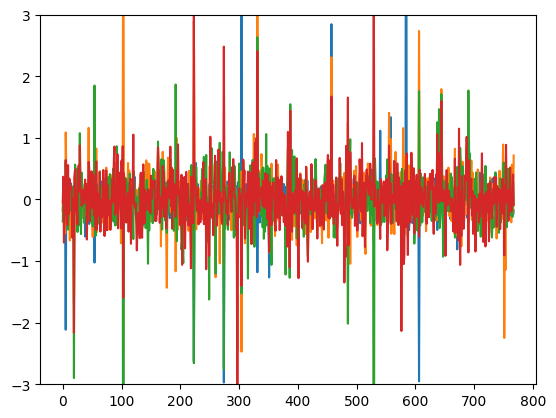

In [56]:
for i in range(4):
    plt.plot(out[0, i].detach())

plt.ylim(-3, 3)

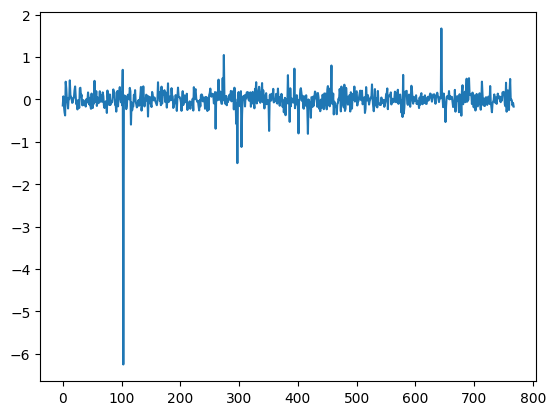

In [67]:
plt.plot(out[0].mean(0).detach())

It's very difficult to tell what features of these plots are similar / different. The large spikes? The small scale structure?

#### Images from different categories

In [153]:
from scipy.stats import pearsonr

tensor([ 75, 120, 137])


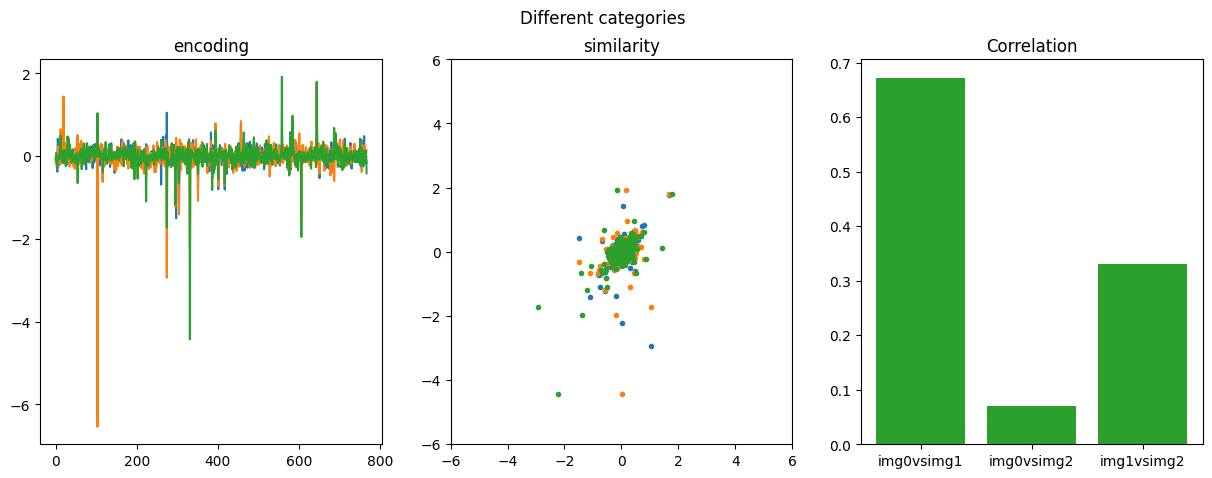

In [161]:
embeddings = model.embedding.embedding(model.preprocess(train[0:3][0]))
mus = embeddings.mean(1).detach()


print(train[0:3][1])

figsize(15, 5)
plt.subplots(1,3)
plt.suptitle('Different categories')
plt.subplot(1,3,1)
plt.title('encoding')
for i in range(3):
    plt.plot(mus[i].detach())

plt.subplot(1,3,2)
plt.title('similarity')
plt.plot(mus[0], mus[1], '.')
plt.plot(mus[0], mus[2], '.')
plt.plot(mus[1], mus[2], '.')
plt.xlim([-6, 6])
_=plt.ylim([-6, 6])

plt.subplot(1,3,3)
plt.title('Correlation')
Rs = []
labels=[]
for i in range(3):
    for j in range(i+1, 3):
        r, p = pearsonr(mus[i], mus[j])
        Rs.append(r)
        labels.append(f'img{i}vsimg{j}')
        plt.bar(labels, Rs)


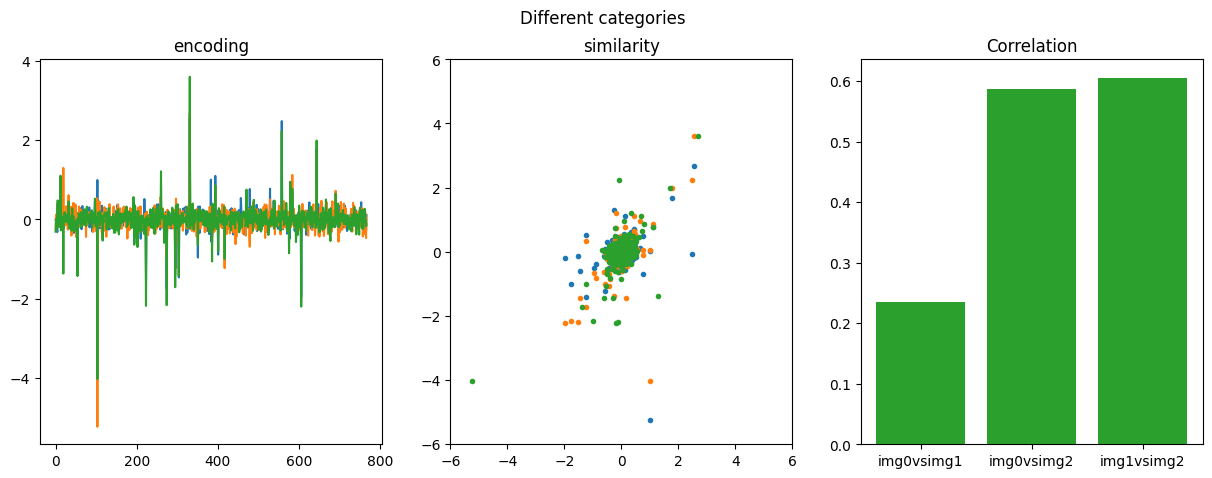

In [160]:
embeddings = model.embedding.embedding(model.preprocess(train[3:6][0]))
mus = embeddings.mean(1).detach()

figsize(15, 5)
plt.subplots(1,3)
plt.suptitle('Different categories')
plt.subplot(1,3,1)
plt.title('encoding')
for i in range(3):
    plt.plot(mus[i].detach())

plt.subplot(1,3,2)
plt.title('similarity')
plt.plot(mus[0], mus[1], '.')
plt.plot(mus[0], mus[2], '.')
plt.plot(mus[1], mus[2], '.')
plt.xlim([-6, 6])
_=plt.ylim([-6, 6])

plt.subplot(1,3,3)
plt.title('Correlation')
Rs = []
labels=[]
for i in range(3):
    for j in range(i+1, 3):
        r, p = pearsonr(mus[i], mus[j])
        Rs.append(r)
        labels.append(f'img{i}vsimg{j}')
        plt.bar(labels, Rs)


#### Multiple images from the same category:

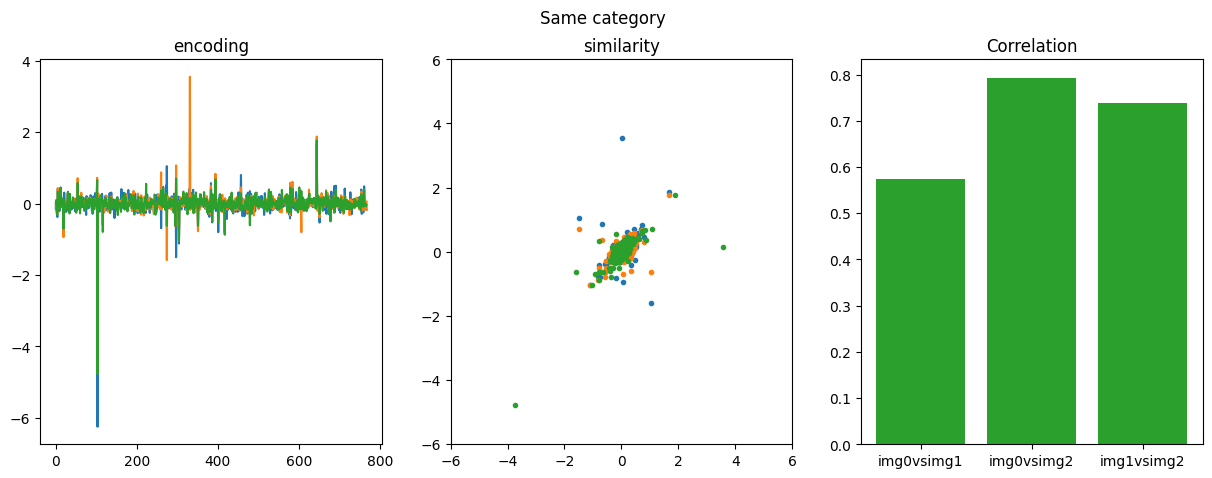

In [165]:
figsize(10, 5)
cat1 = train[torch.where(train[:][1] == 75)[0][0:3].tolist()]

out = model.embedding.embedding(model.preprocess(cat1[0]))
mus = out.mean(1).detach()


figsize(15, 5)
plt.subplots(1,3)
plt.suptitle('Same category')
plt.subplot(1,3,1)
plt.title('encoding')
for i in range(3):
    plt.plot(mus[i].detach())

plt.subplot(1,3,2)
plt.title('similarity')
plt.plot(mus[0], mus[1], '.')
plt.plot(mus[0], mus[2], '.')
plt.plot(mus[1], mus[2], '.')
plt.xlim([-6, 6])
_=plt.ylim([-6, 6])

plt.subplot(1,3,3)
plt.title('Correlation')
Rs = []
labels=[]
for i in range(3):
    for j in range(i+1, 3):
        r, p = pearsonr(mus[i], mus[j])
        Rs.append(r)
        labels.append(f'img{i}vsimg{j}')
        plt.bar(labels, Rs)


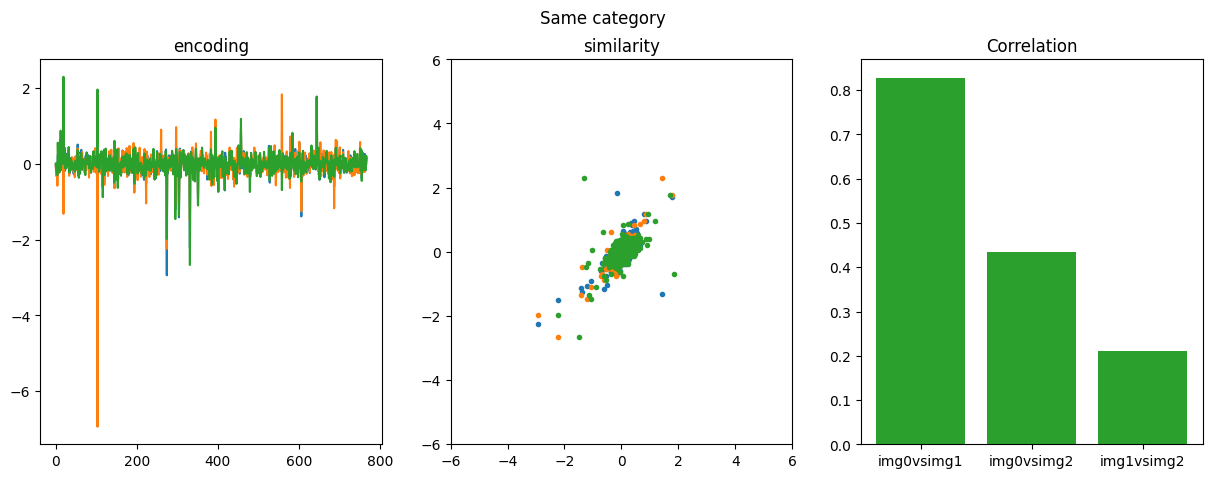

In [166]:
cat1 = train[torch.where(train[:][1] == 120)[0][0:3].tolist()]

out = model.embedding.embedding(model.preprocess(cat1[0]))
mus = out.mean(1).detach()


figsize(15, 5)
plt.subplots(1,3)
plt.suptitle('Same category')
plt.subplot(1,3,1)
plt.title('encoding')
for i in range(3):
    plt.plot(mus[i].detach())

plt.subplot(1,3,2)
plt.title('similarity')
plt.plot(mus[0], mus[1], '.')
plt.plot(mus[0], mus[2], '.')
plt.plot(mus[1], mus[2], '.')
plt.xlim([-6, 6])
_=plt.ylim([-6, 6])

plt.subplot(1,3,3)
plt.title('Correlation')
Rs = []
labels=[]
for i in range(3):
    for j in range(i+1, 3):
        r, p = pearsonr(mus[i], mus[j])
        Rs.append(r)
        labels.append(f'img{i}vsimg{j}')
        plt.bar(labels, Rs)


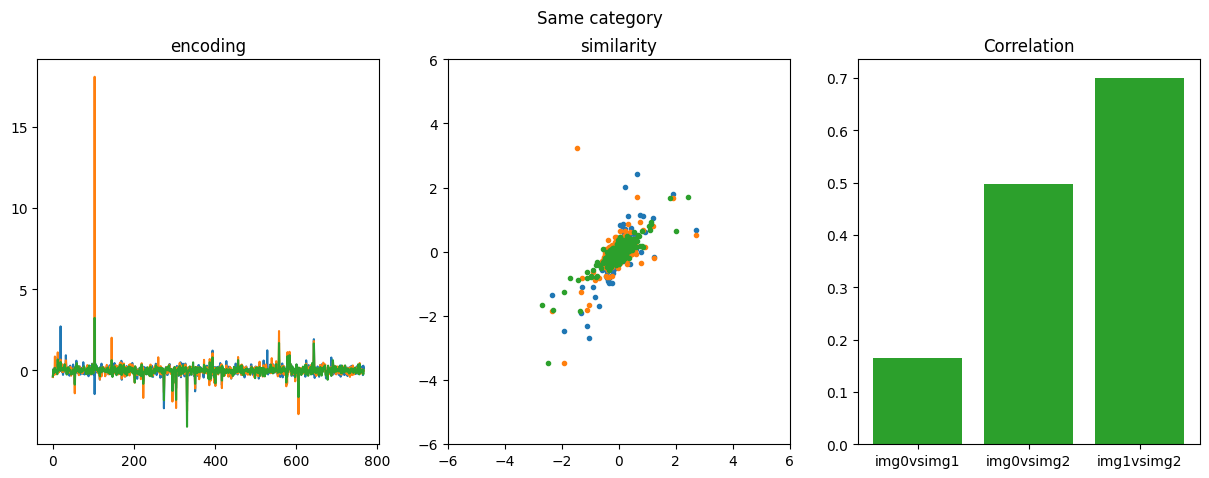

In [167]:
cat1 = train[torch.where(train[:][1] == 175)[0][0:3].tolist()]

out = model.embedding.embedding(model.preprocess(cat1[0]))
mus = out.mean(1).detach()

figsize(15, 5)
plt.subplots(1,3)
plt.suptitle('Same category')
plt.subplot(1,3,1)
plt.title('encoding')
for i in range(3):
    plt.plot(mus[i].detach())

plt.subplot(1,3,2)
plt.title('similarity')
plt.plot(mus[0], mus[1], '.')
plt.plot(mus[0], mus[2], '.')
plt.plot(mus[1], mus[2], '.')
plt.xlim([-6, 6])
_=plt.ylim([-6, 6])

plt.subplot(1,3,3)
plt.title('Correlation')
Rs = []
labels=[]
for i in range(3):
    for j in range(i+1, 3):
        r, p = pearsonr(mus[i], mus[j])
        Rs.append(r)
        labels.append(f'img{i}vsimg{j}')
        plt.bar(labels, Rs)

There is no obvious pattern to the correlations between internal network activities for same / different image categories. This is not surprising: we previously saw that linear probe read-outs weren't sufficient to perform well at classification.

This case is very similar: my classifiers use the 0th token, while this one uses the mean across tokens. Given that classification struggles, how can we expect to learn informative gradients?

## Learning embedding gradients: direct model - First Try

!!! Work on later experiments broke compatibility with these experiments, small change to batch_collators and forward arguments may have to be made.

### Overfitting on the train data

In [7]:
%run loss_models.py

In [8]:
classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')

tiny_train = torch.utils.data.Subset(train, range(16))
activity_ds = ActivityGradientDataDict(classifier_model, classifier_model.embedding.vit, tiny_train)

Successfully loaded weights from vit2_full_sync


In [9]:
gradient_model = EmbeddingToGradient(num_hidden_layers=4)

In [10]:
from transformers import Trainer, TrainingArguments

epochs = 200
training_args = TrainingArguments(
                                  learning_rate=5E-5,
                                  num_train_epochs=epochs,
                                  max_steps=epochs * 2,
                                  per_device_train_batch_size=1,
    
                                  weight_decay= 0.01,
                            
                                  lr_scheduler_type= 'constant',
                                  warmup_ratio= 0.0,
                            
                                  logging_steps= 20,
                                  logging_strategy= "steps",
                            
                                  output_dir= 'gradient_overfit'
                             )

def batch_collator(data):
    return {'inputs': data[0][0],
            'labels': data[0][1]
            }

trainer = Trainer(gradient_model,
                  args=training_args,
                  train_dataset=activity_ds['train'],
                  data_collator=batch_collator
                  )

In [11]:
wandb.init(project="TTA_loss", name="gradient_overfit")
trainer.train()
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lrast. Use `wandb login --relogin` to force relogin


/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
20,1.659300
40,0.951600
60,0.509900
80,0.327500
100,0.235600
120,0.179400
140,0.143100
160,0.118500
180,0.100700
200,0.087400


train/epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇███
train/global_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇███
train/grad_norm,▁▁▂▃▅▄▄▅▅▅▅▆▆▆▆▆▆█▇▇
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_flos,0
train/epoch,199.005
train/global_step,400
train/grad_norm,40.86475
train/learning_rate,5e-05
train/loss,0.0353


Great: the network is able to learn.

### Can it generalize though?

In [12]:
from loss_models import ActivityGradientDataDict, EmbeddingToGradient

In [13]:
classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')
activity_ds = ActivityGradientDataDict(classifier_model, classifier_model.embedding.vit, 
                                       torch.utils.data.Subset(train, range(2000)),
                                       torch.utils.data.Subset(val, range(2000))
                                      )

Successfully loaded weights from vit2_full_sync


In [14]:
gradient_model = EmbeddingToGradient(num_hidden_layers=4)

from transformers import Trainer, TrainingArguments

epochs = 15
training_args = TrainingArguments(
                                  learning_rate=5E-5,
                                  num_train_epochs=epochs,
                                  max_steps=epochs * 2000 // 8,
                                  per_device_train_batch_size=1,
    
                                  weight_decay= 0.01,
                            
                                  lr_scheduler_type= 'constant',
                                  warmup_ratio= 0.0,
                            
                                  logging_steps= 20,
                                  logging_strategy= "steps",

                                  eval_strategy= "epoch",
                                  save_total_limit=1,
                            
                                  output_dir= 'gradient_general'
                             )

def batch_collator(data):
    return {'inputs': data[0][0],
            'labels': data[0][1]
            }

trainer = Trainer(gradient_model,
                  args=training_args,
                  train_dataset=activity_ds['train'],
                  eval_dataset=activity_ds['val'],
                  data_collator=batch_collator
                  )
trainer.can_return_loss = True

In [15]:
wandb.init(project="TTA_loss", name="gradient_generalization")
trainer.train()
wandb.finish()

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
0,0.101700,0.092377
1,0.049200,0.044594
2,0.030600,0.029185
3,0.021700,0.020997
4,0.017500,0.017087
5,0.013500,0.013634
6,0.011600,0.011624
7,0.009300,0.009675
8,0.008300,0.008273
9,0.006900,0.007042


/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/l

eval/loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁
eval/runtime,█▁▁▁▁▁▁▁▁▁▂▁▂▁▁
eval/samples_per_second,▁█████████▇█▇▇▇
eval/steps_per_second,▁█████████▇█▇█▇
train/epoch,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██
train/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇████
train/grad_norm,▂▁▇▄▅▇▆▆▅▇▆▇▇▇▆▇▇▆▇▆▆▇▇▇▆▇▇▇█▇█▇▇▇▇▇████
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.0034
eval/runtime,226.2043


#### Why does this look so good?
I'm only training on 2000 samples, but the validation curves seem to match training quite well, and both fall to very low MSE.

- Perhaps the gradients are watered down by a lot of 'unimportant' points, so they don't cature the most important points despite looking close.
- Similarly, these apparently low losses may not be that low after all.

Need to test whether the learned gradients are actually useful for learning.

- Is there leakage between train and validation points? - unlikely but worth checking
- Do they have the same labels? - Not a problem, but not a measurement of overall generalization performance. 


Notes:
* slight 'epoch stepping' but not major


#### Check for data leakage:

In [16]:
used_train = torch.utils.data.Subset(train, range(2000))
used_val = torch.utils.data.Subset(val, range(2000))

In [73]:
train_labels = [int(used_train[i][1]) for i in range(2000)]
val_labels = [int(used_val[i][1]) for i in range(2000)]

In [24]:
(torch.tensor(train_labels) == torch.tensor(val_labels)).to(int).sum()

tensor(8)

No more overlaps than would be expected.

Text(0.5, 1.0, 'Val labels')

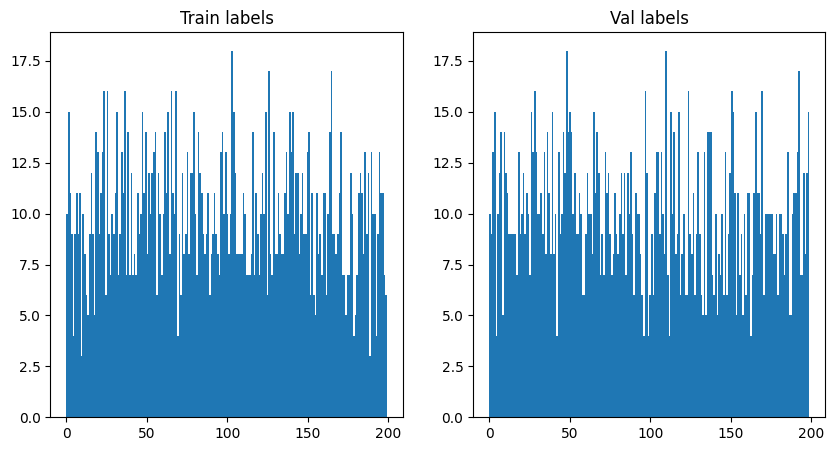

In [34]:
figsize(10,5)
plt.subplots(1,2)

plt.subplot(1,2, 1)
plt.hist(train_labels, bins=200)
plt.title('Train labels')

plt.subplot(1,2, 2)
plt.hist(val_labels, bins=200)
plt.title('Val labels')

Different, but fairly  uniform histograms. Looks good.

In [39]:
print((torch.tensor(train_labels) == 10).sum())
print((torch.tensor(val_labels) == 10).sum())

tensor(10)
tensor(12)


In [77]:
selected_tr, selected_tr_labels = used_train[torch.where(torch.tensor(train_labels) == 10)[0].tolist()]
selected_val, selected_val_labels = used_val[torch.where(torch.tensor(val_labels) == 10)[0].tolist()]

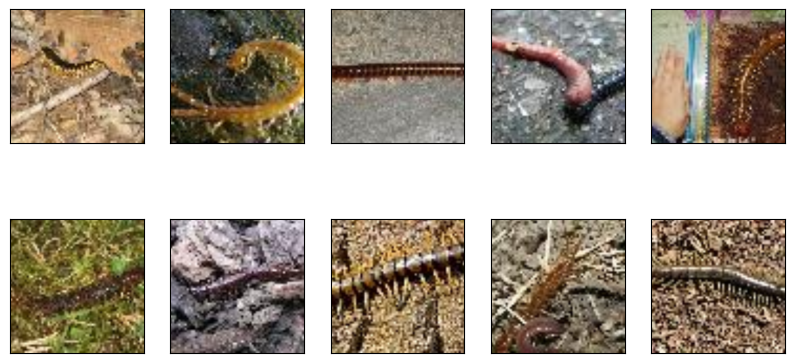

In [89]:
_=plt.subplots(2,5)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(selected_tr[i].permute(1,2,0))
    plt.xticks([])
    plt.yticks([])

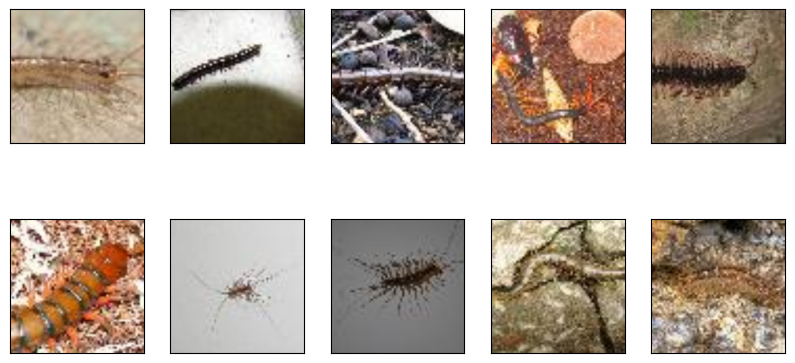

In [90]:
_=plt.subplots(2,5)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(selected_val[i].permute(1,2,0))
    plt.xticks([])
    plt.yticks([])

It certainly doesn't seem like there is overlap in the data.

#### Does stepping in the direction of the gradient actually improve classification?

In [6]:
from loss_models import ActivityGradientDataDict, EmbeddingToGradient
import safetensors

classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')

gradient_model = EmbeddingToGradient(num_hidden_layers=4)

model_state_dict = {}

f = safetensors.safe_open('gradient_general/checkpoint-3750/model.safetensors', framework='pt')
for key in f.keys():
    model_state_dict[key] = f.get_tensor(key)

gradient_model.load_state_dict(model_state_dict)

Successfully loaded weights from vit2_full_sync


<All keys matched successfully>

In [11]:
def classification_output(classifier_model, embeddings):
    # forward steps follow the 
    x = classifier_model.classifier.vit.encoder(embeddings).last_hidden_state
    x = classifier_model.classifier.vit.layernorm(x)[:, 0, :]
    logits = classifier_model.classifier.classifier(x)

    sm_outputs = torch.nn.functional.softmax(logits, dim=1)
    return sm_outputs


def compare_with_gradients(classifier_model, gradient_model,
                           inputs, labels,
                           step=1E-1):
    x = classifier_model.preprocess(inputs)
    embedding = classifier_model.embedding.embedding(x)

    gradient = gradient_model.forward(embedding).predictions
    perturbed_embedding = embedding - step * gradient

    baseline_probs = classification_output(classifier_model, embedding)
    perturbed_probs = classification_output(classifier_model, perturbed_embedding)

    labels = labels.tolist()
    return {'base_probs': baseline_probs[range(len(labels)), labels].tolist(),
            'perturbed_probs': perturbed_probs[range(len(labels)), labels].tolist(),
            'gt_labels': labels,
            'base_class': baseline_probs.argmax(1).tolist(),
            'perturbed_class': perturbed_probs.argmax(1).tolist()
           }




In [12]:
def plot_comparisons(accumulator):
    accumulator['diff'] = accumulator['perturbed_probs'] - accumulator['base_probs']
    plt.subplots(2,2)
    ax=plt.subplot(2,2,1)
    accumulator.plot.scatter(x='base_probs', y='perturbed_probs', ax=ax)
    ax.plot(np.linspace(0,1), np.linspace(0,1), color='C1')
    ax=plt.subplot(2,2,2)
    accumulator.plot.scatter(x='base_probs', y='diff', ax=ax)
    ax.plot(np.linspace(0,1), np.zeros(50), color='C1')

    ax=plt.subplot(2,2,3)
    ax.bar(['increased prob', 'decreased prob'],
           [sum(accumulator['diff'] >0) / len(accumulator), sum(accumulator['diff'] <0) / len(accumulator)])

    ax=plt.subplot(2,2,4)
    ax.bar(['became correct', 'became incorrect'],
           [len( accumulator[(accumulator.base_class != accumulator.gt_labels) &
               (accumulator.perturbed_class == accumulator.gt_labels)] ),
            len( accumulator[(accumulator.base_class == accumulator.gt_labels) &
               (accumulator.perturbed_class != accumulator.gt_labels)] )
           ])
    

In [9]:
from tqdm import tqdm
classifier_model = classifier_model.to('mps')
gradient_model = gradient_model.to('mps')

accumulator = None

dl = torch.utils.data.DataLoader(val, batch_size=16, shuffle=False)

for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_gradients(classifier_model, gradient_model, images, labels))
    torch.mps.empty_cache()
    if accumulator is None:
        accumulator = results
    else:
        accumulator = pd.concat([accumulator, results])

100%|███████████████████████████████████████| 1250/1250 [06:54<00:00,  3.02it/s]


Text(0.5, 0.98, 'Impact of gradient descent')

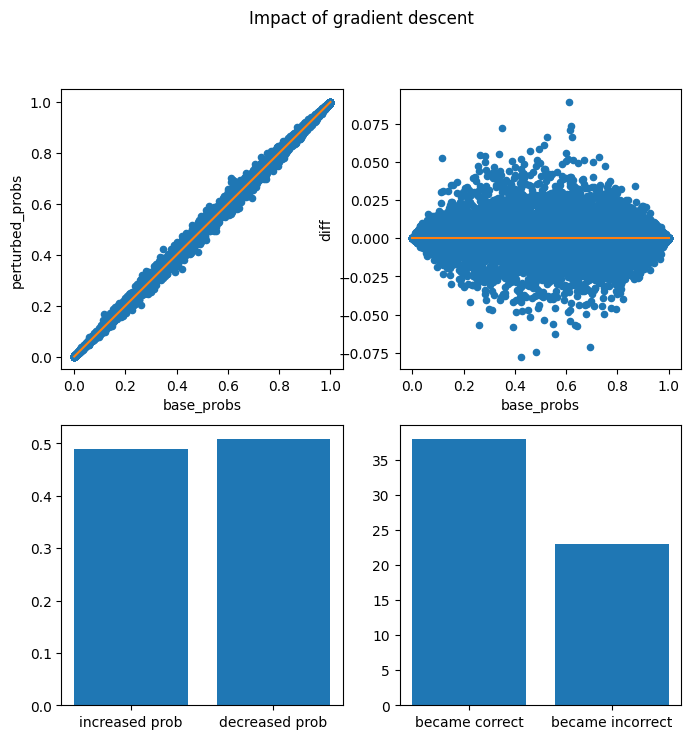

In [10]:
figsize(8,8)
plot_comparisons(accumulator)
plt.suptitle('Impact of gradient descent')

Taking a single step with these gradients seems to have something of a mixed effect:
- the probability assigned to the correct output decreases at least as frequently as it increases
- more points switch to being correct than switch to being incorrect.

In this sense, the gradient model seems to be acting somewhat like we would expect that a gradient model should, but not that well, so the results are mixed

#### Compare to the actual gradients

In [17]:
from loss_models import BatchRecorder
def compare_with_TRUE_gradients(classifier_model, recorder,
                                inputs, labels,
                                step=1E-1):
    
    outs = classifier_model.forward(inputs, labels)

    baseline_probs = torch.nn.functional.softmax(outs.logits, dim=1)

    outs.loss.backward() 
    embedding, gradient = recorder.batch
    perturbed_embedding = embedding - step * gradient
    perturbed_probs = classification_output(classifier_model, perturbed_embedding)

    labels = labels.tolist()
    outputs =  {'base_probs': baseline_probs[range(len(labels)), labels].tolist(),
            'perturbed_probs': perturbed_probs[range(len(labels)), labels].tolist(),
            'gt_labels': labels,
            'base_class': baseline_probs.argmax(1).tolist(),
            'perturbed_class': perturbed_probs.argmax(1).tolist()
           }
    return outputs

In [12]:
from tqdm import tqdm
classifier_model = classifier_model.to('mps')

accumulator_true = None

dl = torch.utils.data.DataLoader(val, batch_size=16, shuffle=False)

recorder = BatchRecorder(classifier_model.embedding.vit)

for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_TRUE_gradients(classifier_model, recorder, images, labels))
    torch.mps.empty_cache()
    if accumulator_true is None:
        accumulator_true = results
    else:
        accumulator_true = pd.concat([accumulator_true, results])

100%|███████████████████████████████████████| 1250/1250 [06:42<00:00,  3.10it/s]


Text(0.5, 0.98, 'Impact of gradient descent - ground truth gradients')

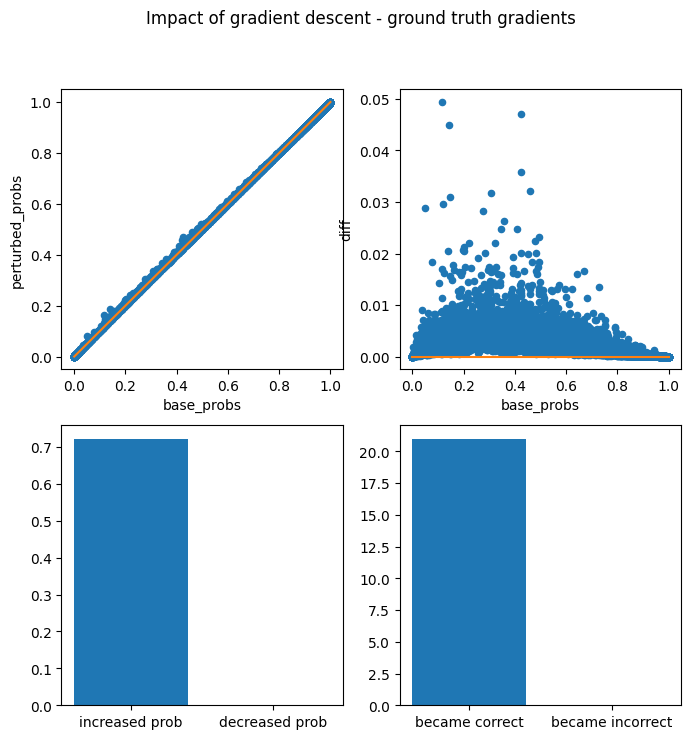

In [13]:
figsize(8,8)
plot_comparisons(accumulator_true)
plt.suptitle('Impact of gradient descent - ground truth gradients')

Using _true_ gradients gives us a strong signal: only increasing probabilities, only increased correctness.
- This is a good way to evaluate the learned gradient results
  

#### Also interesting to mention:

I previously ran this with the gradients pointing in the wrong direction (that is, positive steps, rather than negative step).

100%|███████████████████████████████████████| 1250/1250 [03:31<00:00,  5.90it/s]


Text(0.5, 0.98, 'Impact of gradient ascent')

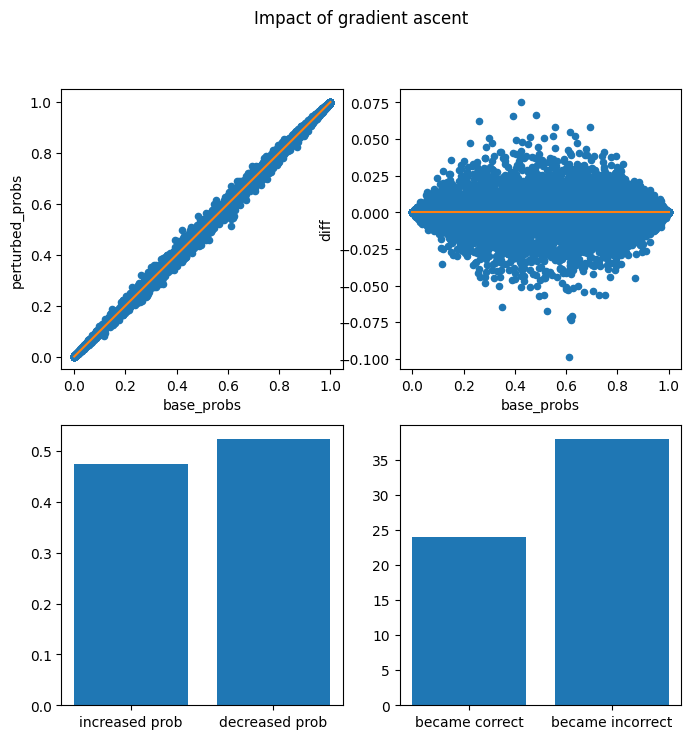

In [14]:
def compare_with_gradients_WRONG_DIRECTION(classifier_model, gradient_model,
                           inputs, labels,
                           step=1E-1):
    x = classifier_model.preprocess(inputs)
    embedding = classifier_model.embedding.embedding(x)

    gradient = gradient_model.forward(embedding).predictions
    perturbed_embedding = embedding + step * gradient

    baseline_probs = classification_output(classifier_model, embedding)
    perturbed_probs = classification_output(classifier_model, perturbed_embedding)

    labels = labels.tolist()
    return {'base_probs': baseline_probs[range(len(labels)), labels].tolist(),
            'perturbed_probs': perturbed_probs[range(len(labels)), labels].tolist(),
            'gt_labels': labels,
            'base_class': baseline_probs.argmax(1).tolist(),
            'perturbed_class': perturbed_probs.argmax(1).tolist()
           }



from tqdm import tqdm
classifier_model = classifier_model.to('mps')
gradient_model = gradient_model.to('mps')

accumulator_WD = None

dl = torch.utils.data.DataLoader(val, batch_size=16, shuffle=False)


for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_gradients_WRONG_DIRECTION(classifier_model, gradient_model, images, labels))

    if accumulator_WD is None:
        accumulator_WD = results
    else:
        accumulator_WD = pd.concat([accumulator_WD, results])

plot_comparisons(accumulator_WD)
plt.suptitle('Impact of gradient ascent')

The results are worse than taking gradient steps in the right direction, but surprisingly similar.
- probabilities decrease more often than increase (similar but more pronounced).
- more became incorrect than became correct (different).

In particular, I think that the similarity in the probability changes is interesting: weakly correct gradients mostly point orthogonal to the direction of improvement, so stepping forward or backward along these directions doesn't much change the effect.

#### Gradient performance on the train data

We have a consistent train split, so we can evaluate on the train data alone.

In [15]:
accumulator = None

dl = torch.utils.data.DataLoader(torch.utils.data.Subset(train, range(2000)),
                                 batch_size=16, shuffle=False)

for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_gradients(classifier_model, gradient_model, images, labels))
    torch.mps.empty_cache()
    if accumulator is None:
        accumulator = results
    else:
        accumulator = pd.concat([accumulator, results])

100%|█████████████████████████████████████████| 125/125 [00:22<00:00,  5.48it/s]


Text(0.5, 0.98, 'Train data performance')

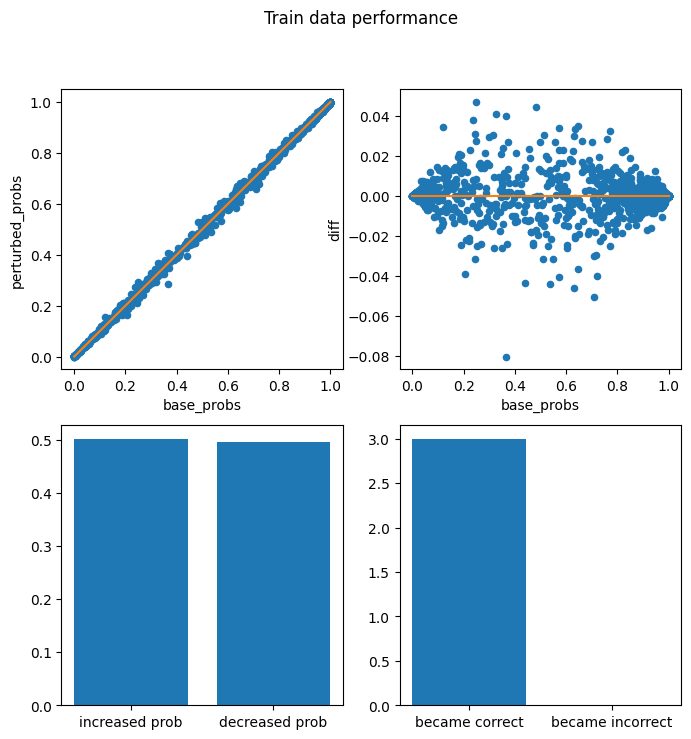

In [16]:
plot_comparisons(accumulator)
plt.suptitle('Train data performance')

Mixed effects, indicates that the low MSE is not sufficient to produce good gradient predictions!

However, we do see _more_ probability increases than decreases, _only_ points becoming correct.

#### Do weak gradients still have good MSE loss?

These evaluation metrics show us that the gradient model performs poorly. Lets check that the MSE is still low.


In [70]:
%run loss_models.py

<Figure size 800x800 with 0 Axes>

In [72]:
classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')
gradient_model = EmbeddingToGradient(num_hidden_layers=4)

model_state_dict = {}

f = safetensors.safe_open('gradient_general/checkpoint-3750/model.safetensors', framework='pt')
for key in f.keys():
    model_state_dict[key] = f.get_tensor(key)

gradient_model.load_state_dict(model_state_dict)


activity_ds = ActivityGradientDataDict(classifier_model, classifier_model.embedding.vit, 
                                       torch.utils.data.Subset(train, range(2000)),
                                       val,
                                       device='mps'
                                      )

Successfully loaded weights from vit2_full_sync


In [75]:
running_loss = 0.0
num_batch = 0

gradient_model = gradient_model.to('mps')
for point, grad in activity_ds['train']:
    loss = gradient_model.forward(point, labels=grad).loss
    running_loss += loss.detach().item()
    num_batch += 1

print(f'MSE, train: {running_loss / num_batch}')

MSE, train: 0.0032738147573545574


In [81]:
running_loss = 0.0
num_batch = 0

gradient_model = gradient_model.to('mps')
for point, grad in tqdm(activity_ds['val'], total=len(val) // 8):
    loss = gradient_model.forward(point, labels=grad).loss
    running_loss += loss.detach().item()
    num_batch += 1

print(f'MSE, val: {running_loss / num_batch}')

100%|███████████████████████████████████████| 2500/2500 [06:53<00:00,  6.05it/s]

MSE, val: 0.0034101892220787704


As expected from the previous, the MSE's are low, even when the gradient do not perform well!

This really is the core of the problem! How do we learn something that will be useful in learning elsewhere. Simple gradient reproduciton is not sufficient.

#### To summarize my current thoughts on these results: 
We are performing gradient learning.

1. MSE improves surprisingly quickly and robustly with few datapoints
2. This translates somewhat, but not very well into improvements in classification.
3. Indicates that either MSE on the gradients is a poor objective or that we are not learning gradients well enough (or both)
4. I am excited by the idea that MSE translates poorly: this is an indication that we need to learn on a better signal.

### Lets try overfitting again to see how good the gradient MSE can get

In [6]:
from loss_models import ActivityGradientDataDict, EmbeddingToGradient

classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')

tiny_train = torch.utils.data.Subset(train, range(16))
activity_ds = ActivityGradientDataDict(classifier_model, classifier_model.embedding.vit, tiny_train, None,
                                      device='mps')

gradient_model = EmbeddingToGradient(num_hidden_layers=8)

Successfully loaded weights from vit2_full_sync


In [7]:
from transformers import Trainer, TrainingArguments

epochs = 2000
training_args = TrainingArguments(
                                  learning_rate=5E-5,
                                  num_train_epochs=epochs,
                                  max_steps=epochs * 2,
                                  per_device_train_batch_size=1,
    
                                  weight_decay= 0.01,
                            
                                  lr_scheduler_type= 'constant',
                                  warmup_ratio= 0.0,
                            
                                  logging_steps= 20,
                                  logging_strategy= "steps",
                            
                                  output_dir= 'gradient_overfit_large'
                             )

def batch_collator(data):
    return {'inputs': data[0][0],
            'labels': data[0][1]
            }

trainer = Trainer(gradient_model,
                  args=training_args,
                  train_dataset=activity_ds['train'],
                  data_collator=batch_collator
                  )

In [8]:
wandb.init(project="TTA_loss", name="gradient_overfit_large")
trainer.train()
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lrast. Use `wandb login --relogin` to force relogin


/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
20,1.201100
40,0.313200
60,0.171500
80,0.118100
100,0.095500
120,0.077200
140,0.065800
160,0.056300
180,0.053000
200,0.045100


/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/l

train/epoch,▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇████
train/global_step,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
train/grad_norm,▆█▅▂▃▃▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_flos,0
train/epoch,1999.0005
train/global_step,4000
train/grad_norm,1.00217
train/learning_rate,5e-05
train/loss,0.0011


In [15]:
from tqdm import tqdm
accumulator = None

dl = torch.utils.data.DataLoader(tiny_train, batch_size=16, shuffle=False)

for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_gradients(classifier_model, gradient_model, images, labels))
    torch.mps.empty_cache()
    if accumulator is None:
        accumulator = results
    else:
        accumulator = pd.concat([accumulator, results])

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


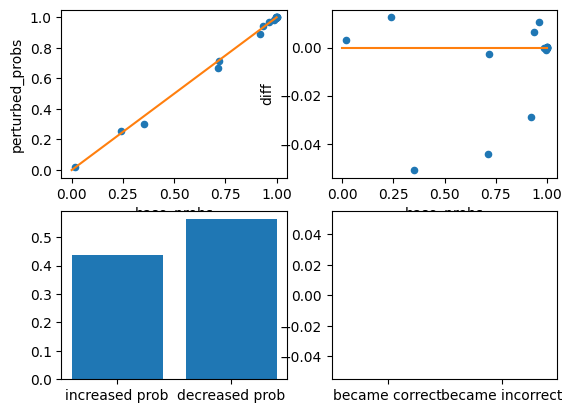

In [16]:
plot_comparisons(accumulator)

Wait, what?

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


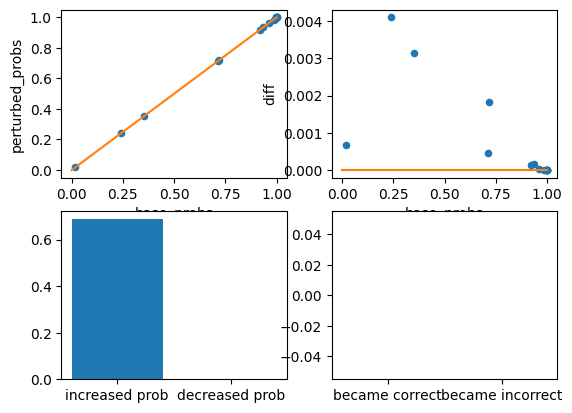

In [18]:
accumulator = None

dl = torch.utils.data.DataLoader(tiny_train, batch_size=16, shuffle=False)
recorder = BatchRecorder(classifier_model.embedding.vit)

for batch in tqdm(iter(dl)):
    images, labels = batch
    images = images.to('mps')
    labels = labels.to('mps')

    results = pd.DataFrame(compare_with_TRUE_gradients(classifier_model, recorder, images, labels))
    torch.mps.empty_cache()
    if accumulator is None:
        accumulator = results
    else:
        accumulator = pd.concat([accumulator, results])

plot_comparisons(accumulator)

In [20]:
for batch_in, batch_label in iter(activity_ds['train']):
    print( gradient_model.forward(batch_in, labels=batch_label).loss)

tensor(0.0008, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(0.0008, device='mps:0', grad_fn=<MseLossBackward0>)


Yep. This result seems to hold even though the MSE is super low.

In [33]:
ground_truth = batch_label.detach().cpu()
fit = gradient_model.forward(batch_in, labels=batch_label).predictions.detach().cpu()

    

(-0.2, 0.2)

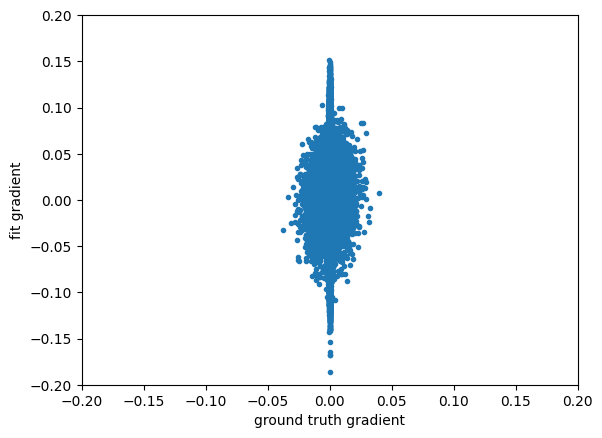

In [48]:
plt.scatter(ground_truth.view(-1), fit.view(-1), marker='.')
plt.xlabel('ground truth gradient')
plt.ylabel('fit gradient')

plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])

In [47]:
((ground_truth.view(-1) - fit.view(-1))**2).mean()

tensor(0.0008)

In [46]:
gradient_model.loss(fit, ground_truth)

tensor(0.0008)

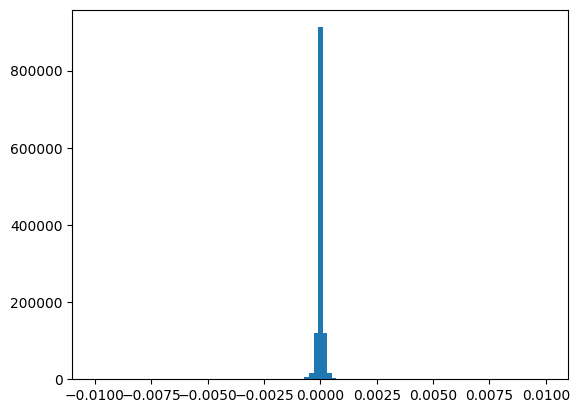

In [54]:
_=plt.hist(ground_truth.view(-1), bins=np.linspace(-0.01, 0.01, 100))

Ahhh, is this because the gradient values are all small? So, the MSE loss (which does not involve a square root) becomes less sensitive as values -> 0.

It's also clear from this plot that the low gradient efficacy is result of the fits being bad: the network was just learning to produce small outputs. On the upside, we now know the how to build the validation metrics: actual impact on performance.

## Learning embedding gradients: direct model 2

The problem with the previous model was that it wasn't learning well enough. The gradients are overwhelmingly small, so the model was just learning to output small values, and getting good MSE that way.

This required some rewriting to get on-line logging, so first a reproduction:

### Reproduction

In [6]:
from loss_models import make_gradient_trainer, EmbeddingToGradient

In [7]:
classifier_model = ClassifierWithTTA.load_from_file('vit2_full_sync')
gradient_model = EmbeddingToGradient(num_hidden_layers=8, classifier_model=classifier_model)

tiny_train = torch.utils.data.Subset(train, range(2000))
tiny_val = torch.utils.data.Subset(val, range(1000))

trainer, model, train_dl, val_dl = make_gradient_trainer(classifier_model, gradient_model, tiny_train, tiny_val,
                                                         run_name='reproduction',default_root_dir='reproduction',
                                                         epochs=100)

Successfully loaded weights from vit2_full_sync


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
trainer.fit(model, train_dl, val_dl)
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lrast. Use `wandb login --relogin` to force relogin



  | Name                         | Type              | Params | Mode 
---------------------------------------------------------------------------
0 | classifier_model             | ClassifierWithTTA | 126 M  | train
1 | local_gradient_approximation | ViTEncoder        | 56.7 M | train
2 | loss                         | MSELoss           | 0      | train
---------------------------------------------------------------------------
182 M     Trainable params
252 K     Non-trainable params
182 M     Total params
731.768   Total estimated model params size (MB)
181       Modules in train mode
353       Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

Interestingly, training over a larger set of sample appears to produce strong validation improvements: up to 80% showed imporved probability, but still very low to no classification improvements.

In [27]:
classifier_model.to('mps')
model.to('mps')
embeddings_val, gradients_val, labels = map(lambda x: x.squeeze(), next(iter(val_dl)))
embeddings_train, gradients_train = map(lambda x: x.squeeze(), next(iter(train_dl)))

In [28]:
predictions_val = model(embeddings_val).predictions
predictions_train = model(embeddings_train).predictions

Text(0.5, 1.0, 'Fits vs ground truth - validation')

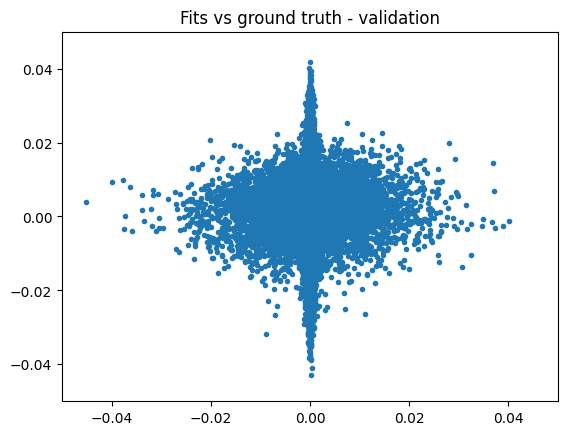

In [31]:
plt.scatter(gradients_val.view(-1).detach().cpu(), predictions_val.view(-1).detach().cpu(), marker='.')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Fits vs ground truth - validation')

In [35]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr( gradients_val.view(-1).detach().cpu(), predictions_val.view(-1).detach().cpu()))
print(spearmanr( gradients_val.view(-1).detach().cpu(), predictions_val.view(-1).detach().cpu()))

PearsonRResult(statistic=np.float64(0.004259841046975076), pvalue=np.float32(2.7784342e-06))
SignificanceResult(statistic=np.float64(5.808689914781133e-05), pvalue=np.float64(0.949045680901287))


Text(0.5, 1.0, 'Fits vs ground truth - validation')

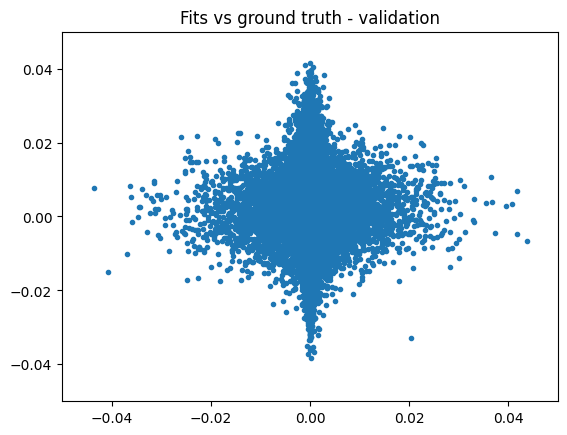

In [33]:
plt.scatter(gradients_train.view(-1).detach().cpu(), predictions_train.view(-1).detach().cpu(), marker='.')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Fits vs ground truth - validation')

In [36]:
print(pearsonr( gradients_train.view(-1).detach().cpu(), predictions_train.view(-1).detach().cpu()))
print(spearmanr( gradients_train.view(-1).detach().cpu(), predictions_train.view(-1).detach().cpu()))

PearsonRResult(statistic=np.float64(0.0015683947227270532), pvalue=np.float32(0.08443816))
SignificanceResult(statistic=np.float64(-0.010579067041546809), pvalue=np.float64(2.6088452854090514e-31))


Again, we see very low alignment, but the scale is further improved by more training. Need architechture and loss function improvements.

### Model improvements

Let's make sure that the model can actually fit well, in the sense of good looking plots.

In [6]:
%run loss_models.py

In [7]:
classifier_model = ClassifierWithTTA.load_from_file('base_models_for_TTA/vit2_full_sync')
gradient_model = EmbeddingToGradient(num_hidden_layers=8, classifier_model=classifier_model)

tiny_train = torch.utils.data.Subset(train, range(64))
tiny_val = torch.utils.data.Subset(val, range(64))

trainer, model, train_dl, val_dl = make_gradient_trainer(classifier_model, gradient_model, tiny_train, tiny_val,
                                                         run_name='overfit_new', checkpoint_directory='overfit_new',
                                                         epochs=100)

Successfully loaded weights from base_models_for_TTA/vit2_full_sync


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
trainer.fit(model, train_dl, val_dl)
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lrast. Use `wandb login --relogin` to force relogin


/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/luke/Documents/activeProjects/TTA_working/overfit_new exists and is not empty.

  | Name                         | Type              | Params | Mode 
---------------------------------------------------------------------------
0 | local_gradient_approximation | ViTEncoder        | 56.7 M | train
1 | decoder                      | Sequential        | 1.2 M  | train
2 | loss                         | L1Loss            | 0      | train
3 | classifier_model             | ClassifierWithTTA | 126 M  | train
---------------------------------------------------------------------------
183 M     Trainable params
252 K     Non-trainable params
184 M     Total params
736.492   Total estimated model params size (MB)
185       Modules in train mode
353       Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
eval/improved_classification,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/improved_probability,▃▁▂▂▂▁▁▁▁▁▂▂▂▂▂▃▂▂▂▂▂▃▃▃▃▄▄▅▅▅▄▃▂▃▃█▆█▇█
eval/loss,█▆▆▆▆▅▅▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇████
epoch,99
eval/improved_classification,0
eval/improved_probability,0.75
eval/loss,0.00021
train/loss,0.00011


Interestingly, this one also shows good evaluation loss and more that 50% probability improvements, even from the first epoch. It seems that these two metrics have more to do with output size than anything.

In [10]:
classifier_model.to('mps')
model.to('mps')
embeddings_val, gradients_val, labels = map(lambda x: x.squeeze(), next(iter(val_dl)))
embeddings_train, gradients_train = map(lambda x: x.squeeze(), next(iter(train_dl)))

predictions_val = model(embeddings_val).predictions
predictions_train = model(embeddings_train).predictions

Text(0.5, 1.0, 'Fits vs ground truth - validation')

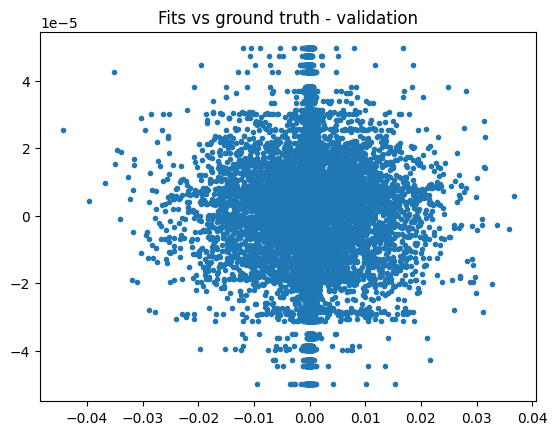

In [14]:
plt.scatter(gradients_val.view(-1).detach().cpu(), predictions_val.view(-1).detach().cpu(), marker='.')
plt.title('Fits vs ground truth - validation')

Text(0.5, 1.0, 'Fits vs ground truth - train')

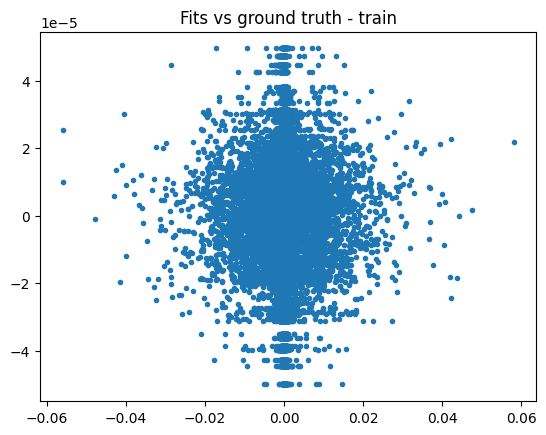

In [15]:
plt.scatter(gradients_train.view(-1).detach().cpu(), predictions_train.view(-1).detach().cpu(), marker='.')
plt.title('Fits vs ground truth - train')

Text(0.5, 1.0, 'Fits vs ground truth - train')

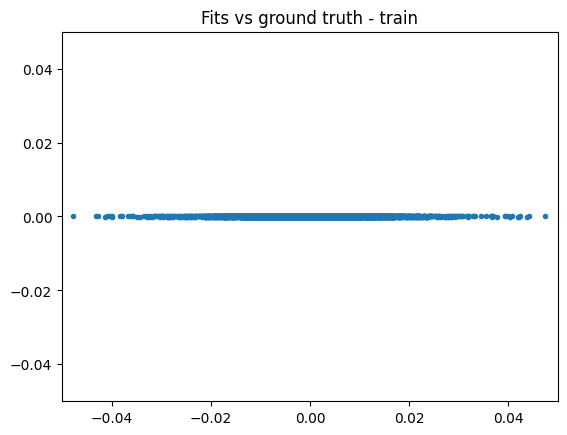

In [16]:
plt.scatter(gradients_train.view(-1).detach().cpu(), predictions_train.view(-1).detach().cpu(), marker='.')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Fits vs ground truth - train')

This one learned a different approach: it squished everything to almost zero. This exposes a key degeneracy: the size of the gradients, which could be scaled arbitrarily depending on step size.

#### What if we just normalize both before taking the error?

In [42]:
%run loss_models.py

In [43]:
classifier_model = ClassifierWithTTA.load_from_file('base_models_for_TTA/vit2_full_sync')
gradient_model = EmbeddingToGradient(num_hidden_layers=8, classifier_model=classifier_model)

tiny_train = torch.utils.data.Subset(train, range(64))
tiny_val = torch.utils.data.Subset(val, range(64))

trainer, model, train_dl, val_dl = make_gradient_trainer(classifier_model, gradient_model, tiny_train, tiny_val,
                                                         run_name='overfit_new_2', checkpoint_directory='overfit_new_2',
                                                         epochs=100)

Successfully loaded weights from base_models_for_TTA/vit2_full_sync


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [44]:
trainer.fit(model, train_dl, val_dl)
wandb.finish()


  | Name                         | Type              | Params | Mode 
---------------------------------------------------------------------------
0 | local_gradient_approximation | ViTEncoder        | 56.7 M | train
1 | decoder                      | Sequential        | 1.2 M  | train
2 | loss                         | L1Loss            | 0      | train
3 | classifier_model             | ClassifierWithTTA | 126 M  | train
---------------------------------------------------------------------------
183 M     Trainable params
252 K     Non-trainable params
184 M     Total params
736.492   Total estimated model params size (MB)
185       Modules in train mode
353       Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


epoch,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
eval/improved_classification,▅▁████████▅▅▅▅▅▅▅▁▁▅▅▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅
eval/improved_probability,██▅▅▅▂▃▂▂▂▂▁▁▂▁▁▃▂▂▂▃▄▂▂▂▄▄▄▄▄▄▅▅▅▅▆▅▇▆▅
eval/loss,█▆▅▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▆▄▅▂▂▂▂▁▂▂▂▂▁▁▁▂▂▂▂▁▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▂▂▂
trainer/global_step,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
epoch,99
eval/improved_classification,0
eval/improved_probability,0.53125
eval/loss,0.00047
train/loss,0.00051


In [45]:
classifier_model.to('mps')
model.to('mps')
embeddings_val, gradients_val, labels = map(lambda x: x.squeeze(), next(iter(val_dl)))
embeddings_train, gradients_train = map(lambda x: x.squeeze(), next(iter(train_dl)))

predictions_val = model(embeddings_val).predictions
predictions_train = model(embeddings_train).predictions


Text(0.5, 1.0, 'Fits vs ground truth - validation')

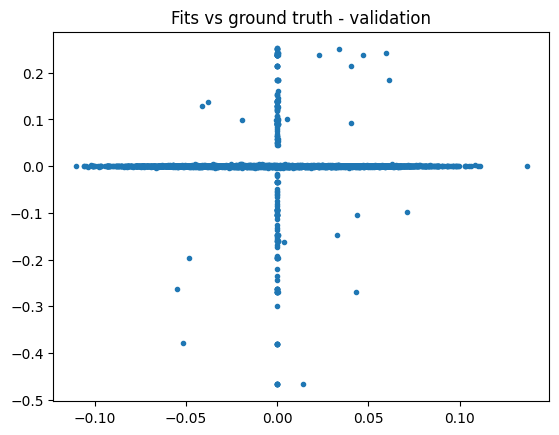

In [65]:
norm_gradients = gradients_val / torch.norm(gradients_val, dim=(1, 2))[:, None, None]
norm_predictions = predictions_val / torch.norm(predictions_val, dim=(1, 2))[:, None, None]

plt.scatter(norm_gradients.view(-1).detach().cpu(), norm_predictions.view(-1).detach().cpu(), marker='.')
plt.title('Fits vs ground truth - validation')

Text(0.5, 1.0, 'Fits vs ground truth - train')

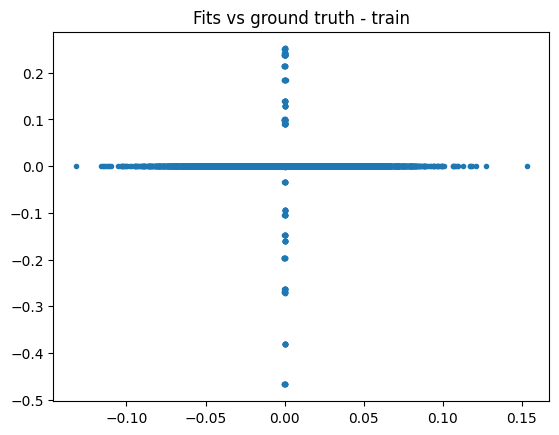

In [69]:
norm_gradients = gradients_train / torch.norm(gradients_train, dim=(1, 2))[:, None, None]
norm_predictions = predictions_train / torch.norm(predictions_train, dim=(1, 2))[:, None, None]

plt.scatter(norm_gradients.view(-1).detach().cpu(), norm_predictions.view(-1).detach().cpu(), marker='.')
plt.title('Fits vs ground truth - train')

What? What is going on here? 

In [89]:
((norm_gradients < 1E-8) & (norm_predictions < 1E-8)).sum() / (8*197*768)

tensor(0.2757, device='mps:0')

In [90]:
((norm_gradients < 1E-8)).sum() / (8*197*768)

tensor(0.5002, device='mps:0')

In [91]:
((norm_predictions < 1E-8)).sum() / (8*197*768)

tensor(0.5064, device='mps:0')

In [97]:
((norm_gradients > 1E-5) & (norm_predictions > 1E-5)).sum() / (8*197*768)

tensor(0.1938, device='mps:0')

In [98]:
((norm_predictions > 1E-5)).sum() / (8*197*768)

tensor(0.3572, device='mps:0')

Ok, so each individually has about 50% zeros. About 30% of them overlap in the outputs. 

Non-zero points are harder to count, but the above plot shows that the large differences, the ones that are establishing the norm are farily orthogonal

Normalizing did not seem to help.

(-0.001, 0.001)

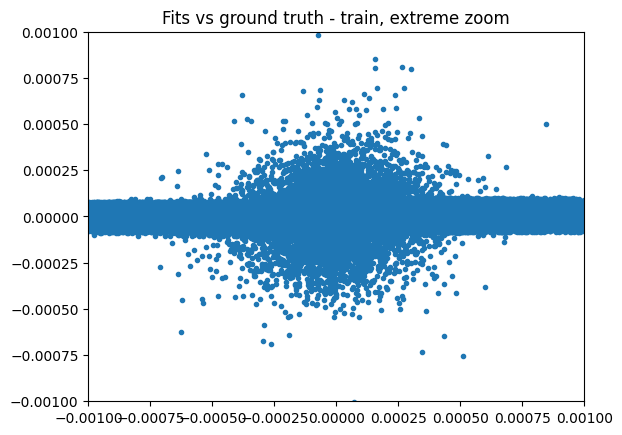

In [104]:
norm_gradients = gradients_train / torch.norm(gradients_train, dim=(1, 2))[:, None, None]
norm_predictions = predictions_train / torch.norm(predictions_train, dim=(1, 2))[:, None, None]

plt.scatter(norm_gradients.view(-1).detach().cpu(), norm_predictions.view(-1).detach().cpu(), marker='.')
plt.title('Fits vs ground truth - train, extreme zoom')
plt.xlim([-0.001, 0.001])
plt.ylim([-0.001, 0.001])

Maybe the previous analysis really was on to something, and the gradients are difficult to fit with these model architectures.